<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/Board_Game_Geek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Board Game Geek

https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/games.csv')

In [ ]:
data.keys()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73594 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    73594 non-null  int64  
 1   type                  73594 non-null  object 
 2   name                  73594 non-null  object 
 3   yearpublished         73594 non-null  float64
 4   minplayers            73594 non-null  float64
 5   maxplayers            73594 non-null  float64
 6   playingtime           73594 non-null  float64
 7   minplaytime           73594 non-null  float64
 8   maxplaytime           73594 non-null  float64
 9   minage                73594 non-null  float64
 10  users_rated           73594 non-null  int64  
 11  average_rating        73594 non-null  float64
 12  bayes_average_rating  73594 non-null  float64
 13  total_owners          73594 non-null  int64  
 14  total_traders         73594 non-null  int64  
 15  total_wanters      

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000,73594.000000
mean,71153.788651,1995.014594,1.992635,5.711104,52.958257,50.503642,52.958257,7.151588,178.522502,4.395985,1.270685,289.342582,10.155828,13.942237,46.939886,54.251719,18.165815,0.968484
std,59047.245714,81.409466,0.911922,58.761940,355.752631,343.760148,355.752631,5.013515,1203.328293,3.005607,2.422741,1578.993639,41.500099,63.723714,251.100773,298.919892,121.783251,1.192931
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20167.250000,1991.000000,2.000000,2.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41993.500000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,3.000000,5.500000,0.000000,9.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,128300.750000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,21.000000,6.788543,0.000000,66.000000,3.000000,3.000000,8.000000,11.000000,3.000000,2.000000
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [ ]:
data.average_rating.hist()
# as we see there are some games that has never releast and so they have zero ratings and have to be deleted
data.drop(data[data.users_rated == 0].index, axis=0, inplace=True)
data.dropna(axis=0, inplace=True)

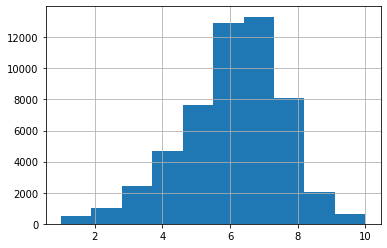

In [ ]:
data.average_rating.hist()

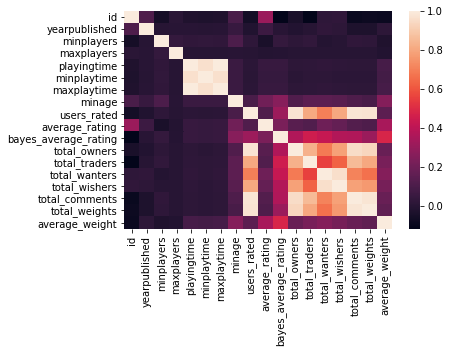

In [ ]:
sns.heatmap(data.corr())
# darker ===> less corrolation
# brighter ===> More corrolation

In [ ]:
x = data.drop(columns=['bayes_average_rating', 'average_weight', 'id', 'type','name'])
y = data.average_weight
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, random_state=45, test_size=0.2)

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(train_x, train_y)
h1 = lr.predict(test_x)

In [ ]:
metrics.mean_squared_error(h1, test_y)

1.1085506322567367

In [ ]:
rfr=ensemble.RandomForestRegressor(n_estimators=200, min_samples_leaf=20, random_state=23)
rfr.fit(train_x, train_y)
h = rfr.predict(test_x)

In [ ]:
metrics.mean_squared_error(h, test_y)

0.2326763161970122

In [ ]:
n=3766
test_1 = test_x.iloc[n].values.reshape(1, -1)
print(test_y.iloc[n])
print(test_x.iloc[n])

2.7671
yearpublished     2005.00000
minplayers           2.00000
maxplayers           2.00000
playingtime         30.00000
minplaytime         30.00000
maxplaytime         30.00000
minage              10.00000
users_rated       1197.00000
average_rating       6.86001
total_owners      2029.00000
total_traders       45.00000
total_wanters      143.00000
total_wishers      347.00000
total_comments     480.00000
total_weights      146.00000
Name: 958, dtype: float64


In [ ]:
h1=lr.predict(test_1)
h2=rfr.predict(test_1)
h1, h2

(array([2.34916397]), array([2.12756727]))